<a href="https://colab.research.google.com/github/BoogeunSong/song/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

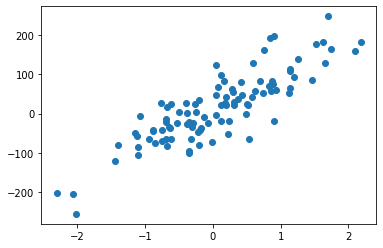

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

x,y = make_regression(n_samples=100,
                      n_features=1,
                      n_informative=1,
                      noise=50,
                      random_state=1)
plt.scatter(x,y)
plt.show()

In [ ]:
np.mean(y),np.min(y),np.max(y),np.median(y)
(15.293427290684107, -255.11169199137663, 247.19463389209255, 20.62597485010551)

lr=LinearRegression()

lr.fit(x,y)

pred=lr.predict(x) #pred=>y_hat

In [ ]:
#검증,평가
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse) #mean_abolte_ellor()
r2 = r2_score(y, pred)
print('MSE:', mse)
print('RMSE:', rmse)
print('R square:', r2)

MSE: 2078.5472792307764
RMSE: 45.59108771712709
R square: 0.7321024057172182


In [ ]:
from sklearn.model_selection import cross_val_score
score_list=cross_val_score(lr,x,y,cv=5,scoring='r2')

print("평균 R2", np.mean(score_list))


평균 R2 0.6845162761863837


In [ ]:
score_list = cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')

score_list=score_list*-1
score_list

np.sort(score_list)

print('평균 MSE',np.mean(score_list))

평균 MSE 2179.661490191461


기울기: [85.14546889] 절편: 10.135071944054275


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_

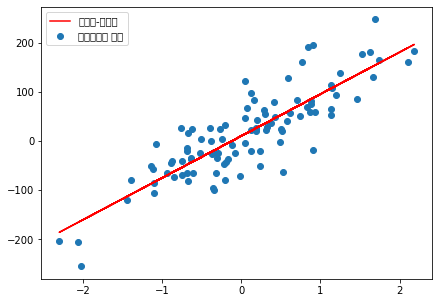

In [ ]:
print("기울기:",lr.coef_,"절편:",lr.intercept_)

pred_y = lr.coef_ * x+lr.intercept_
pred_y[:5]

pred[:5]

plt.figure(figsize=(7,5))
plt.scatter(x,y,label='실제데이터 분포')
plt.plot(x,pred_y,color='red',label='예측선-회귀선')
plt.legend()
plt.show()